In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
lats = np.random.uniform(-90.000,90.000, size = 1500)
lngs = np.random.uniform(-180.000,180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the longitudes to a list
coordinates = list(lat_lngs)

In [4]:
#Import citipy module 
from citipy import citipy

In [5]:
# Create cities and countries list 
cities = []

In [6]:
# Print closest city to coordinates in list 

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)

cities


['kahului',
 'mataura',
 'pevek',
 'gardone val trompia',
 'nizhneyansk',
 'bredasdorp',
 'upernavik',
 'codrington',
 'hervey bay',
 'ushuaia',
 'nanortalik',
 'totskoye',
 'yellowknife',
 'nueve de julio',
 'ratne',
 'pecos',
 'zharkent',
 'busselton',
 'isiro',
 'saint george',
 'rikitea',
 'grand forks',
 'rafai',
 'babati',
 'jamestown',
 'kapaa',
 'havre-saint-pierre',
 'sidhi',
 'faridpur',
 'barentsburg',
 'egvekinot',
 'mar del plata',
 'hofn',
 'albany',
 'illoqqortoormiut',
 'tumannyy',
 'bati',
 'amderma',
 'hilo',
 'barrow',
 'coihaique',
 'skalistyy',
 'airai',
 'namatanai',
 'boa vista',
 'new norfolk',
 'pasni',
 'ancud',
 'tongren',
 'port-gentil',
 'saskylakh',
 'tautira',
 'satitoa',
 'cabo san lucas',
 'phangnga',
 'butaritari',
 'rungata',
 'kalabo',
 'punta arenas',
 'samusu',
 'seguela',
 'los llanos de aridane',
 'gorontalo',
 'fortuna',
 'esperance',
 'bluff',
 'sao filipe',
 'cape town',
 'porto santo',
 'ngong',
 'tupik',
 'mehamn',
 'cochrane',
 'lavrentiya'

In [7]:
# Importing and verifying version of requests 
import requests 
requests.__version__


'2.23.0'

In [8]:
# Import the API key.
from config import weather_api_key


In [9]:
# Starting URL for Weather Map API Call.

units = "Imperial"
url = "https://api.openweathermap.org/data/2.5/weather?units="+ units + "&APPID=" + weather_api_key
print(url)

# Create an endpoint for the url 
city = "hasaki"
city_url1 = url + "&q=" + city
print(city_url1)


https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ef826f4e389ac5a724a73d434c5d2520
https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ef826f4e389ac5a724a73d434c5d2520&q=hasaki


In [10]:
city_weather1 = requests.get(city_url1).json()


# Get the JSON data.
boston_data = city_weather1
boston_data

{'coord': {'lon': 140.83, 'lat': 35.73},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 63.14,
  'feels_like': 61.68,
  'temp_min': 62.01,
  'temp_max': 64.4,
  'pressure': 1006,
  'humidity': 77},
 'visibility': 10000,
 'wind': {'speed': 5.82, 'deg': 10},
 'clouds': {'all': 75},
 'dt': 1590611539,
 'sys': {'type': 1,
  'id': 7955,
  'country': 'JP',
  'sunrise': 1590607427,
  'sunset': 1590659068},
 'timezone': 32400,
 'id': 2112802,
 'name': 'Hasaki',
 'cod': 200}

In [11]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)


35.73 140.83 64.4 77 75 5.82


In [12]:
# Convert date and time format to DateTime format within Python 
from datetime import datetime 
date = boston_data['dt']

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S') 



'2020-05-27 20:32:19'

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

units = "Imperial"
url = "https://api.openweathermap.org/data/2.5/weather?units="+ units + "&APPID="+ weather_api_key

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list 
for i, city in enumerate(cities): 
    
    # Group cities in sets of 50 for logging purposes =.
    if (i % 50 == 0 and i >=50):
        set_count +=1
        record_count +=1
        # Create endpoint URL with each city. 
    city_edited = city.replace(" ","+")
    city_url = url + "&q=" + city.replace(" ", "+")
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print(f"{city_edited} not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-------------------------------------------------")
print("Data Retrieval Complete      ")
print(f"{len(city_data)} Weather Data Records Retrieved")
print("-------------------------------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kahului
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | pevek
Processing Record 4 of Set 1 | gardone val trompia
Processing Record 5 of Set 1 | nizhneyansk
nizhneyansk not found. Skipping...
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | codrington
Processing Record 9 of Set 1 | hervey bay
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | nanortalik
Processing Record 12 of Set 1 | totskoye
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | nueve de julio
Processing Record 15 of Set 1 | ratne
Processing Record 16 of Set 1 | pecos
Processing Record 17 of Set 1 | zharkent
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | isiro
Processing Record 20 of Set 1 | saint george
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | 

Processing Record 184 of Set 4 | remontnoye
Processing Record 185 of Set 4 | kupang
Processing Record 186 of Set 4 | olafsvik
Processing Record 187 of Set 4 | provideniya
Processing Record 188 of Set 4 | siniscola
Processing Record 189 of Set 4 | puerto leguizamo
Processing Record 190 of Set 4 | thompson
Processing Record 191 of Set 4 | san policarpo
Processing Record 192 of Set 4 | san jeronimo
Processing Record 193 of Set 4 | mecca
Processing Record 194 of Set 4 | kailua
Processing Record 195 of Set 4 | ossora
Processing Record 196 of Set 4 | bambanglipuro
Processing Record 197 of Set 4 | belushya guba
belushya+guba not found. Skipping...
Processing Record 198 of Set 4 | maungaturoto
Processing Record 199 of Set 4 | constitucion
Processing Record 200 of Set 4 | ulaangom
Processing Record 201 of Set 4 | ayagoz
Processing Record 202 of Set 4 | praia da vitoria
Processing Record 203 of Set 4 | tuatapere
Processing Record 205 of Set 5 | qaanaaq
Processing Record 206 of Set 5 | grand cent

Processing Record 373 of Set 8 | batagay-alyta
Processing Record 374 of Set 8 | rocha
Processing Record 375 of Set 8 | noumea
Processing Record 376 of Set 8 | tillabery
tillabery not found. Skipping...
Processing Record 377 of Set 8 | pushkino
Processing Record 378 of Set 8 | scottsbluff
Processing Record 379 of Set 8 | mount isa
Processing Record 380 of Set 8 | jutai
Processing Record 381 of Set 8 | tabou
Processing Record 382 of Set 8 | ngukurr
ngukurr not found. Skipping...
Processing Record 383 of Set 8 | louisbourg
louisbourg not found. Skipping...
Processing Record 384 of Set 8 | mayo
Processing Record 385 of Set 8 | college
Processing Record 386 of Set 8 | port hawkesbury
Processing Record 387 of Set 8 | miass
Processing Record 388 of Set 8 | pacific grove
Processing Record 389 of Set 8 | baykit
Processing Record 390 of Set 8 | royan
Processing Record 391 of Set 8 | caconda
Processing Record 392 of Set 8 | zalantun
Processing Record 393 of Set 8 | grand river south east
grand+ri

Processing Record 558 of Set 11 | omboue
Processing Record 559 of Set 11 | tiznit
Processing Record 560 of Set 11 | orchard homes
Processing Record 562 of Set 12 | yenagoa
Processing Record 563 of Set 12 | alta floresta
Processing Record 564 of Set 12 | the pas
Processing Record 565 of Set 12 | gat
Processing Record 566 of Set 12 | sofiysk
sofiysk not found. Skipping...
Processing Record 567 of Set 12 | machilipatnam
Processing Record 568 of Set 12 | kendari
Processing Record 569 of Set 12 | ojinaga
Processing Record 570 of Set 12 | price
Processing Record 571 of Set 12 | chinsali
Processing Record 572 of Set 12 | mananjary
Processing Record 573 of Set 12 | wanaka
Processing Record 574 of Set 12 | vila franca do campo
Processing Record 575 of Set 12 | glasgow
Processing Record 576 of Set 12 | betare oya
Processing Record 577 of Set 12 | pamanukan
Processing Record 578 of Set 12 | saryshagan
saryshagan not found. Skipping...
Processing Record 579 of Set 12 | tianpeng
Processing Record 5

In [14]:
city_data

[{'City': 'Kahului',
  'Lat': 20.89,
  'Lng': -156.47,
  'Max Temp': 87.8,
  'Humidity': 48,
  'Cloudiness': 40,
  'Wind Speed': 8.05,
  'Country': 'US',
  'Date': '2020-05-27 20:31:16'},
 {'City': 'Mataura',
  'Lat': -46.19,
  'Lng': 168.86,
  'Max Temp': 37.76,
  'Humidity': 86,
  'Cloudiness': 0,
  'Wind Speed': 1.88,
  'Country': 'NZ',
  'Date': '2020-05-27 20:32:19'},
 {'City': 'Pevek',
  'Lat': 69.7,
  'Lng': 170.31,
  'Max Temp': 37.96,
  'Humidity': 76,
  'Cloudiness': 100,
  'Wind Speed': 15.86,
  'Country': 'RU',
  'Date': '2020-05-27 20:32:19'},
 {'City': 'Gardone Val Trompia',
  'Lat': 45.69,
  'Lng': 10.19,
  'Max Temp': 69.8,
  'Humidity': 49,
  'Cloudiness': 5,
  'Wind Speed': 2.24,
  'Country': 'IT',
  'Date': '2020-05-27 20:32:20'},
 {'City': 'Bredasdorp',
  'Lat': -34.53,
  'Lng': 20.04,
  'Max Temp': 55.4,
  'Humidity': 58,
  'Cloudiness': 0,
  'Wind Speed': 6.93,
  'Country': 'ZA',
  'Date': '2020-05-27 20:32:20'},
 {'City': 'Upernavik',
  'Lat': 72.79,
  'Lng': -56

In [15]:
# Convert the array of dictionaries to a PD DataFrame 

city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kahului,20.89,-156.47,87.80,48,40,8.05,US,2020-05-27 20:31:16
1,Mataura,-46.19,168.86,37.76,86,0,1.88,NZ,2020-05-27 20:32:19
2,Pevek,69.70,170.31,37.96,76,100,15.86,RU,2020-05-27 20:32:19
3,Gardone Val Trompia,45.69,10.19,69.80,49,5,2.24,IT,2020-05-27 20:32:20
4,Bredasdorp,-34.53,20.04,55.40,58,0,6.93,ZA,2020-05-27 20:32:20


In [16]:
# Changing Column Order 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order] 
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kahului,US,2020-05-27 20:31:16,20.89,-156.47,87.80,48,40,8.05
1,Mataura,NZ,2020-05-27 20:32:19,-46.19,168.86,37.76,86,0,1.88
2,Pevek,RU,2020-05-27 20:32:19,69.70,170.31,37.96,76,100,15.86
3,Gardone Val Trompia,IT,2020-05-27 20:32:20,45.69,10.19,69.80,49,5,2.24
4,Bredasdorp,ZA,2020-05-27 20:32:20,-34.53,20.04,55.40,58,0,6.93
...,...,...,...,...,...,...,...,...,...
539,Mahon,ES,2020-05-27 20:34:55,39.89,4.27,66.20,93,20,6.93
540,Poum,NC,2020-05-27 20:34:56,-20.23,164.02,75.52,80,46,11.77
541,Eureka,US,2020-05-27 20:34:27,40.80,-124.16,66.99,69,17,3.00
542,Makat,KZ,2020-05-27 20:30:14,47.65,53.35,77.22,39,49,9.17


In [17]:
# Create the output file (CSV)
output_data_file = "Data/cities.csv"

# Export the City_data into a CSV 
city_data_df.to_csv(output_data_file, index_label = "City_ID")


In [18]:
# Extract Relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


In [19]:
# Import the time module 
import time 
# Get today's date in seconds. 
today = time.time()
today = time.strftime("%x")
today

'05/27/20'

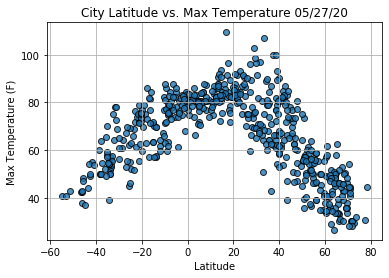

In [29]:
# Build the scatter plot for latitude vs. max temperature. 
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", 
           alpha = 0.8, label = "Cities")

# incorporate the other graph properties 
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude") 
plt.grid(True)

# Save the figure
plt.savefig("analysis/Fig1.png")


# Show plot. 
plt.show()


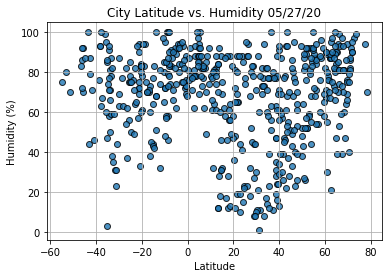

In [30]:
# Build the scatter plot for latitude vs. Humidity. 
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker = "o", 
           alpha = 0.8, label = "Cities")

# incorporate the other graph properties 
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude") 
plt.grid(True)

# Save the figure
plt.savefig("analysis/Fig2.png")


# Show plot. 
plt.show()

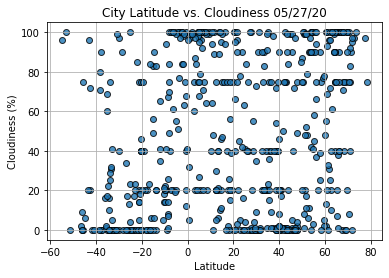

In [31]:
# Build the scatter plot for latitude vs. max temperature. 
plt.scatter(lats, cloudiness, edgecolor = "black", linewidths = 1, marker = "o", 
           alpha = 0.8, label = "Cities")

# incorporate the other graph properties 
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude") 
plt.grid(True)

# Save the figure
plt.savefig("analysis/Fig3.png")


# Show plot. 
plt.show()

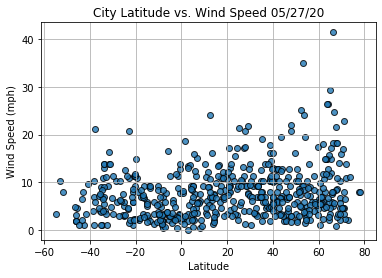

In [32]:
# Build the scatter plot for latitude vs. max temperature. 
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths = 1, marker = "o", 
           alpha = 0.8, label = "Cities")

# incorporate the other graph properties 
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude") 
plt.grid(True)

# Save the figure
plt.savefig("analysis/Fig4.png")


# Show plot. 
plt.show()

In [33]:
# Import regression modules 
from scipy.stats import linregress

In [34]:
# Practice using linregress using random numbers:

# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [36]:
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
#get the equation of the line: 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")


y = -0.45x + 92.94
The p-value is: 0.011


In [37]:
# Calculate the regression line "y values" from the slope and intercept:
regress_values = [(lat*slope + intercept) for lat in lats]


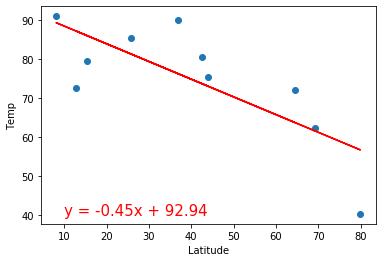

In [38]:
# Create a scatter plot of the x and y values. 
plt.scatter(lats,temps)
plt.plot(lats, regress_values, "r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()


In [86]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept. 
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"The r-value for this x-y pair is {r_value}")

In [87]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kahului,US,2020-05-27 20:31:16,20.89,-156.47,87.80,48,40,8.05
2,Pevek,RU,2020-05-27 20:32:19,69.70,170.31,37.96,76,100,15.86
3,Gardone Val Trompia,IT,2020-05-27 20:32:20,45.69,10.19,69.80,49,5,2.24
5,Upernavik,GL,2020-05-27 20:32:21,72.79,-56.15,29.52,97,97,2.06
9,Nanortalik,GL,2020-05-27 20:29:03,60.14,-45.24,37.94,82,48,8.10


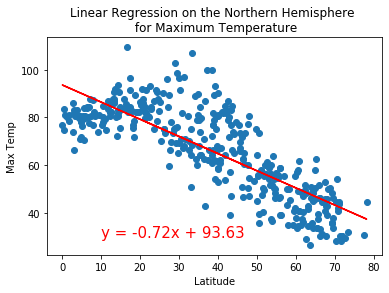

The r-value for this x-y pair is -0.8085319045874486


In [88]:
# Linear Regression on the NOrthern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature'
                      , 'Max Temp', (10,30))


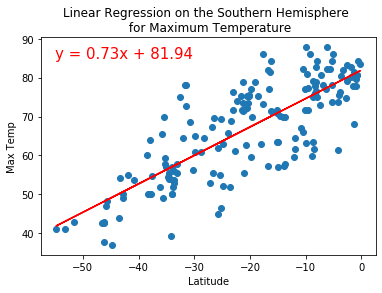

The r-value for this x-y pair is 0.7897601638164647


In [89]:
# Linear Regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature'
                      , 'Max Temp', (-55,85))

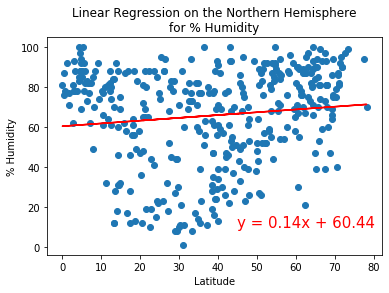

The r-value for this x-y pair is 0.12019108379082581


In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(45,10))


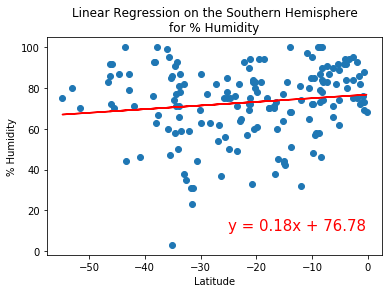

The r-value for this x-y pair is 0.13681323193613265


In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-25,10))


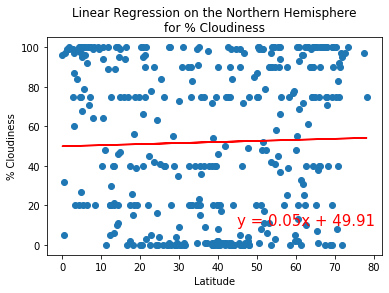

The r-value for this x-y pair is 0.02918340903937216


In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(45,10))


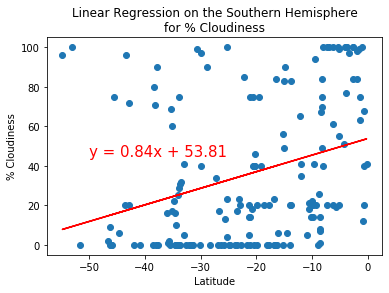

The r-value for this x-y pair is 0.31731201073072657


In [95]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,45))


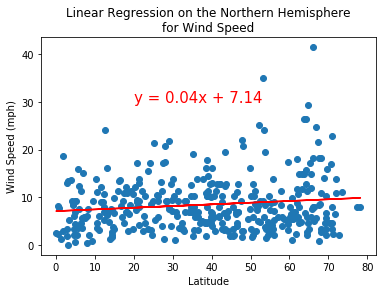

The r-value for this x-y pair is 0.13095282671243974


In [97]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed (mph)',(20,30))


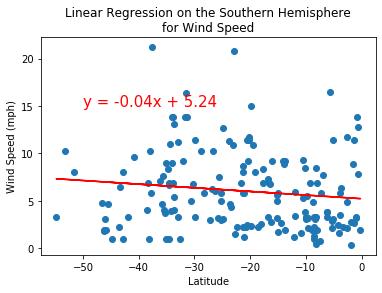

The r-value for this x-y pair is -0.12647188533966777


In [99]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed (mph)',(-50,15))
